# Import all the required libraries 
inline statement - displays the graphs in the current notebook

In [153]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn import preprocessing

Read the train.csv file into DataFrame house_prices

In [2]:
house_prices = pd.read_csv("E:\Data Science\Capstone Project - House prices\Datasets\\train.csv")

In [3]:
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


h_p is the copy of DataFrame train_house_prices

In [4]:
h_p = house_prices.copy()

In [5]:
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# DATA MUNGING & DATA CLEANING

- Some of the columns in the housing prices data contain null values. I introduced a class/category 'missing' for all the NaNs in the categorical features.
- Also I have replaced the column values - 'NA - No Basement' with 'NoBsmnt' and 'NA - No Garage' with 'NoGrg' - I did this for my convinience, it is absolutely not mandatory.

In [6]:
h_p.FireplaceQu=["No Fireplace" if x is np.nan else x for x in h_p.FireplaceQu]

In [7]:
h_p.Alley=["No alley access" if x is np.nan else x for x in h_p.Alley]

In [8]:
h_p.PoolQC=["No Pool" if x is np.nan else x for x in h_p.PoolQC]

In [9]:
h_p.Fence=["No Fence" if x is np.nan else x for x in h_p.Fence]

In [10]:
h_p.MiscFeature=["None" if x is np.nan else x for x in h_p.MiscFeature]

In [11]:
h_p.MasVnrType=["missing" if x is np.nan else x for x in h_p.MasVnrType]

In [12]:
h_p.BsmtQual=["No Bsmnt" if x is np.nan else x for x in h_p.BsmtQual]

In [13]:
h_p.BsmtCond=["No Bsmnt" if x is np.nan else x for x in h_p.BsmtCond]

In [14]:
h_p.BsmtExposure=["No Bsmnt" if x is np.nan else x for x in h_p.BsmtExposure]

In [15]:
h_p.BsmtFinType1=["No Bsmnt" if x is np.nan else x for x in h_p.BsmtFinType1]

In [16]:
h_p.BsmtFinType2=["No Bsmnt" if x is np.nan else x for x in h_p.BsmtFinType2]

In [17]:
h_p.GarageType=["No Grg" if x is np.nan else x for x in h_p.GarageType]

In [18]:
h_p.GarageFinish=["No Grg" if x is np.nan else x for x in h_p.GarageFinish]

In [19]:
h_p.GarageCond=["No Grg" if x is np.nan else x for x in h_p.GarageCond]

In [20]:
h_p.GarageQual=["No Grg" if x is np.nan else x for x in h_p.GarageQual]

In [21]:
h_p.Electrical=["missing" if x is np.nan else x for x in h_p.Electrical]

**Numerical variables like LotFrontage, GarageYrBlt, MasVnrArea have null values. I used imputation - mean of the values of a column to deal with missing data.**

In [22]:
h_p['LotFrontage'].interpolate(method='linear', axis=0, inplace=True)

In [23]:
h_p['GarageYrBlt'].interpolate(method='linear', axis=0, inplace=True)

In [24]:
h_p['MasVnrArea'].interpolate(method='linear', axis=0, inplace=True)

Check if h_p has any null values

In [25]:
h_p.isnull().values.any()

False

In [26]:
h_p.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.205479,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.586644,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,23.051007,9981.264932,1.382997,1.112799,30.202904,20.645407,180.728103,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.500000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Divided the dataframe into - numerical and categorical

Numerical variables - h_p_numerical

In [27]:
h_p_numerical = h_p.select_dtypes(include = [np.number])

In [28]:
h_p_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [29]:
h_p_numerical.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.205479,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.586644,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,23.051007,9981.264932,1.382997,1.112799,30.202904,20.645407,180.728103,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.500000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Categorical variables - h_p_categorical

In [30]:
h_p_categorical = h_p.select_dtypes(include = [object])

In [31]:
h_p_categorical = h_p_categorical.apply(lambda x: x.astype('category'))

In [32]:
h_p_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null category
Street           1460 non-null category
Alley            1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd      1460 non-null category
MasVnrType       1460 non-null category
ExterQual        1460 non-null category
ExterCond        1460 non-null category
Foundation       1460 non-null category
BsmtQual         1460 non-null category
BsmtCond     

In [33]:
h_p_categorical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


I used Pearson correlation on resultant variable 'Sale Price' to find out the strongest correlated variables that effect the final sale price of the house

In [34]:
h_p_numerical_corr = h_p_numerical.corr(method='pearson')['SalePrice']

In [35]:
h_p_numerical_corr[np.argsort(h_p_numerical_corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.474279
GarageYrBlt      0.467290
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotFrontage      0.310673
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

(5) major variables that are strongly correlated with the 'Sale Price'

In [36]:
h_p_numerical_corr.sort_values(ascending = False).head(6)

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

In [37]:
h_p_numerical_topfive = h_p_numerical[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','SalePrice']]

# Exploratory Data Analysis 

**Numerical data - EDA**

In [38]:
list(h_p_numerical.columns.values)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

Let us first get an idea of how each variable is related to the other

This can be made convinient through plotting pairplot in Seaborn

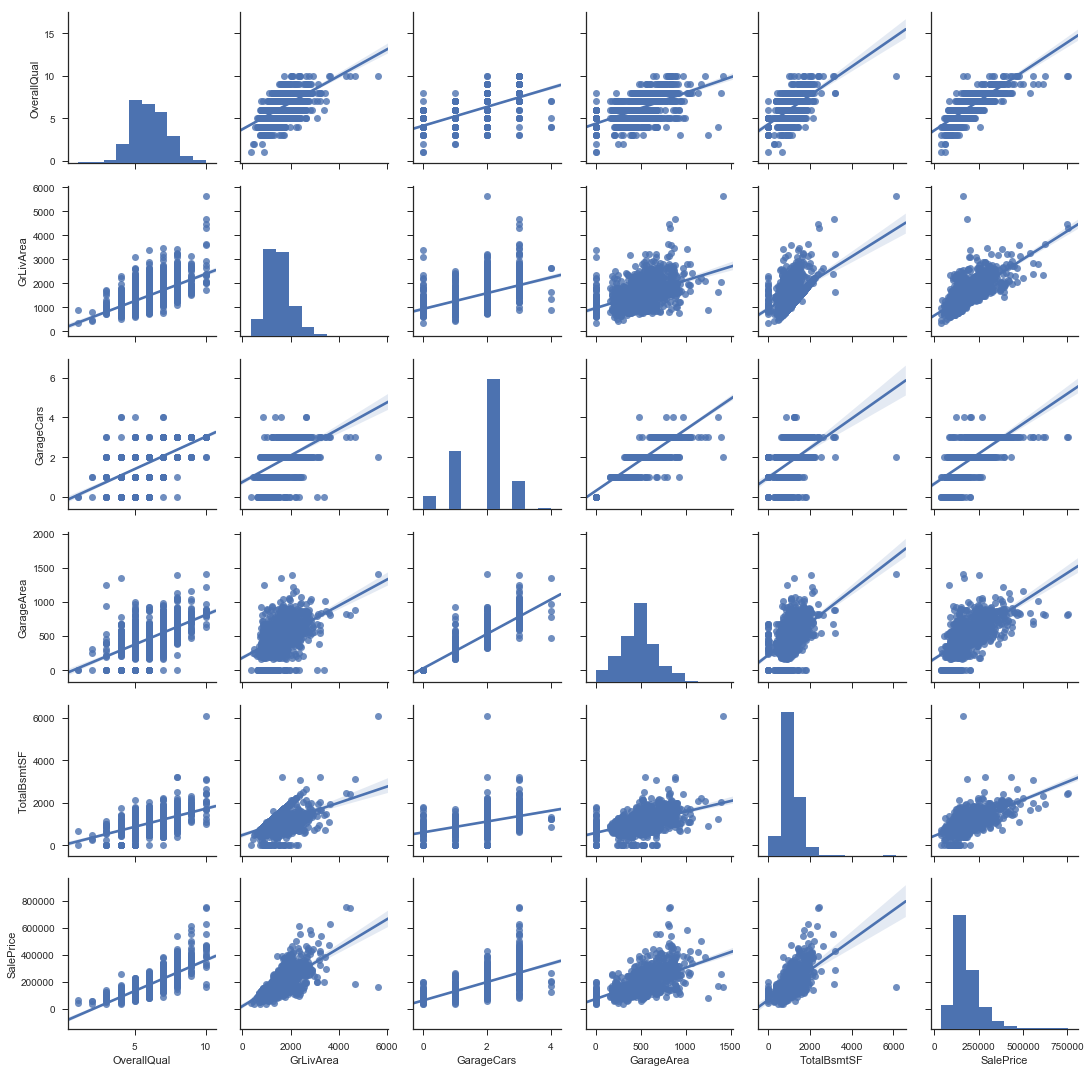

In [39]:
sns.set_style('white')
sns.set_style('ticks')
sns.pairplot(h_p_numerical_topfive, kind='reg')

**A heat map can be more interactive. Let us plot a heat map between the five most correlated variables**

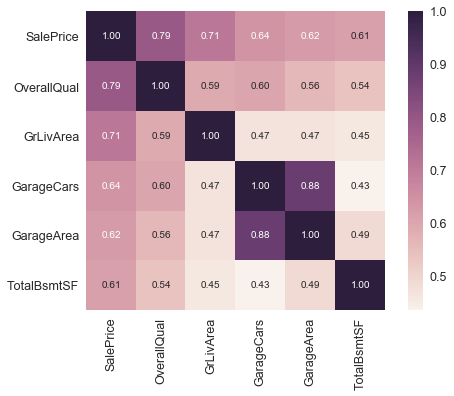

In [40]:
corrmatrix = h_p_numerical.corr()
k = 6 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(h_p_numerical[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values)
plt.show()

Heatmap is the best way to get a quick overview of the relationships between varaibles. The correlation between the variables is so strong that it can indicate a situation of multicollinearity.

**Let us explore the correlation between each of the above numerical variables (top 5) in more detail**

Minimum Ground living area of a house ranging from quality 3-10 is 1000 sqft

From the boxplot it is evident that Overall Quality of the house and Ground Living Area are positively correlated. The better the house quality the more the Ground Living Area. Also from the median of each box plot we can say that the 'average Ground Living Area' increases with increase in quality

Note: Above Grade Area - the part of the dwelling that is above the ground line (1st, 2nd.. floors)

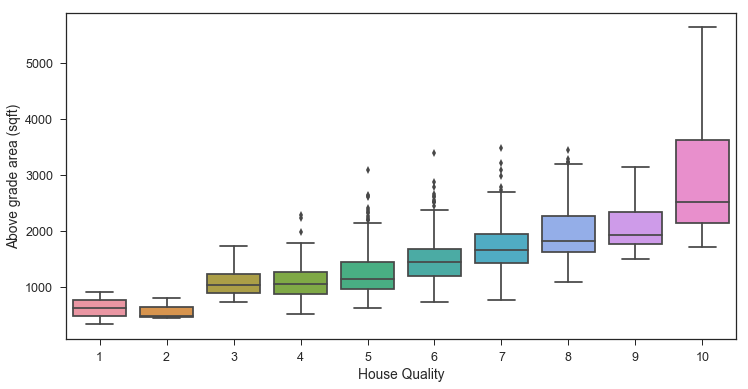

In [41]:
sns.set_style('white')
sns.set_style('ticks')
plt.figure(figsize=(12,6))
g = sns.boxplot(x='OverallQual', y='GrLivArea', data=h_p_numerical)
g.set(xlabel='House Quality', ylabel='Above grade area (sqft)')

From the bar plot we can say that Overall Quality and Garage cars are positively correlated. 

High quality houses can accommodate more number of cars in garage (obviously garage area is bigger)

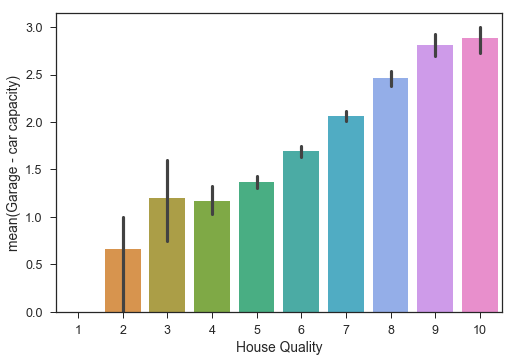

In [42]:
sns.set_style('white')
sns.set_style('ticks')
g= sns.barplot(x='OverallQual', y='GarageCars', data=h_p_numerical)
g.set(xlabel='House Quality', ylabel='mean(Garage - car capacity)')

There are a few houses with no garages. 

All the houses ranked above 5 (house quality) have mimium Garage Area with 100 sqft

Also on an average high quality houses have larger garage areas

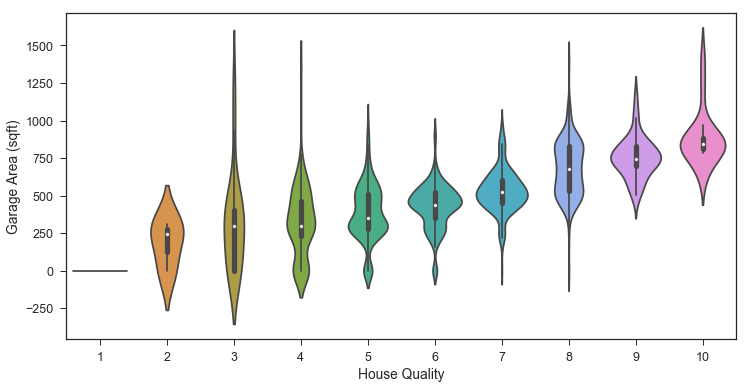

In [43]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g = sns.violinplot(x='OverallQual', y='GarageArea', data=h_p_numerical)
g.set(xlabel='House Quality', ylabel='Garage Area (sqft)')

Basement areas range from 300 sqft to 2700 sqft

Overall Quality and Basement area show linear corelation, good quality houses have larger basement

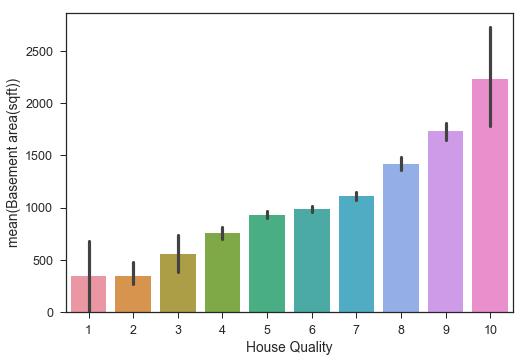

In [44]:
sns.set_style('white')
sns.set_style('ticks')
p = sns.barplot(x='OverallQual', y='TotalBsmtSF', data=h_p_numerical)
p.set(xlabel='House Quality', ylabel='mean(Basement area(sqft))')

Inference from the graph below - greater the garage capacity, there's an increase in the Above grade area (top/ 1st floor)

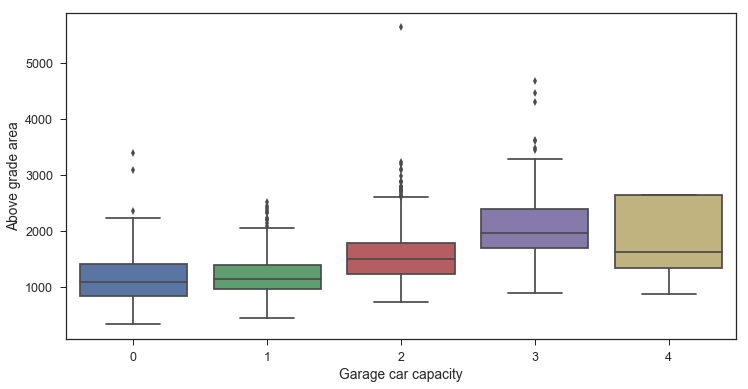

In [45]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
p= sns.boxplot(x='GarageCars', y='GrLivArea', data=h_p_numerical)
p.set(xlabel='Garage car capacity', ylabel='Above grade area')

There seems to be a positive correlation between Garage area and Above grade area. If a house has bigger garage then the top floor/s have are bigger in area too

Garage area, garage car capacity are both positively corelated to Above grade area

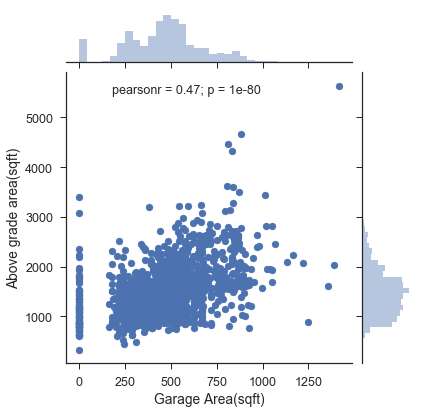

In [46]:
sns.set_style('white')
sns.set_style('ticks')
g = sns.jointplot(x='GarageArea', y='GrLivArea', data=h_p_numerical)
g.set_axis_labels('Garage Area(sqft)','Above grade area(sqft)')

Ground Living Area and Total Basement are positively correlated. 

The scatter plot shows thay houses with bigger Basement area also have bigger Ground living area

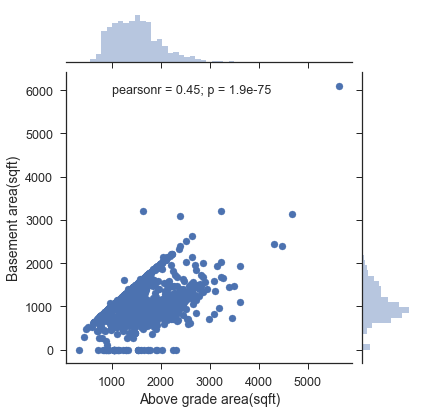

In [47]:
sns.set_style('white')
sns.set_style('ticks')
g = sns.jointplot(x='GrLivArea', y='TotalBsmtSF', data=h_p_numerical)
g.set_axis_labels('Above grade area(sqft)','Basement area(sqft)')

The plot clearly shows a linear relationship between Garage car capacity and Garage area

Of course, it is obvious that bigger garages accommodate more cars, it is more evident with the violin plot below 

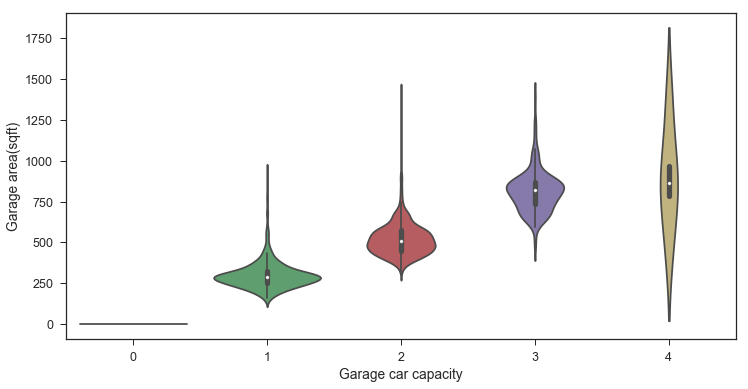

In [48]:
plt.figure(figsize=(12,6))
sns.set_style('white')
sns.set_style('ticks')
g= sns.violinplot(x='GarageCars', y='GarageArea', data=h_p_numerical)
g.set(xlabel='Garage car capacity', ylabel='Garage area(sqft)')

There is not much to talk about Garage car capacity and Basment area. 

There is no relation between them.


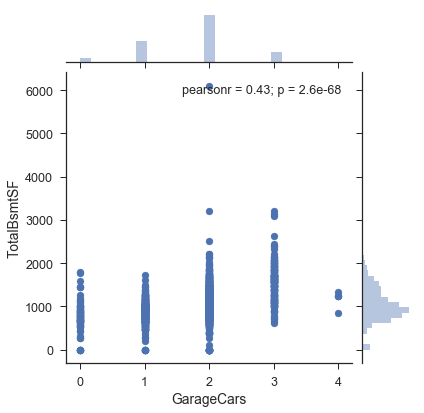

In [49]:
sns.set_style('white')
sns.set_style('ticks')
sns.jointplot(x='GarageCars', y='TotalBsmtSF', data=h_p_numerical)


Clearly garage area and total basement area are positively correlated

Houses with bigger garages also have bigger basements

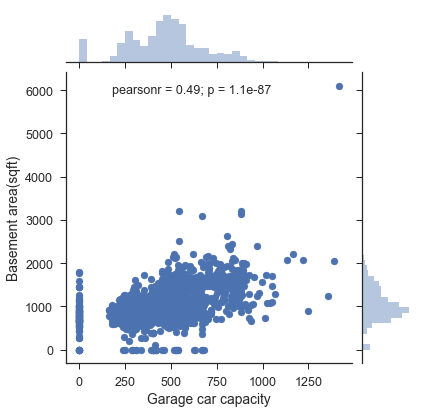

In [50]:
sns.set_style('white')
sns.set_style('ticks')
g= sns.jointplot(x='GarageArea', y='TotalBsmtSF', data=h_p_numerical)
g.set_axis_labels('Garage car capacity','Basement area(sqft)')

 # Categorical data - EDA

I would like to explore the relationship between all categorical varibales with the output variable i.e. Sale Price

In [51]:
list(h_p_categorical.columns.values)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Floating village residences and Residential low density are expensive compared to others.

Residential low density zone houses are more in number, it also has many outliers, On an average they range between $130,000 - $230,000

Clearly there is no pattern between zones and final sale price


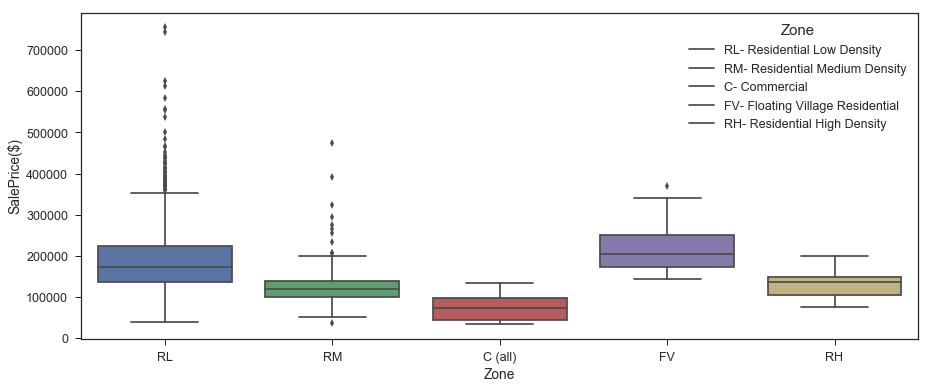

In [52]:
plt.figure(figsize = (15, 6))
c = sns.boxplot(x='MSZoning', y='SalePrice', data=h_p)
c.set(xlabel='Zone', ylabel='SalePrice($)')
c.legend(['RL- Residential Low Density','RM- Residential Medium Density','C- Commercial','FV- Floating Village Residential',
               'RH- Residential High Density'], title='Zone')

There are a very few columns (hardly 5) with category Gravel. This varible might not have any effect on sale price

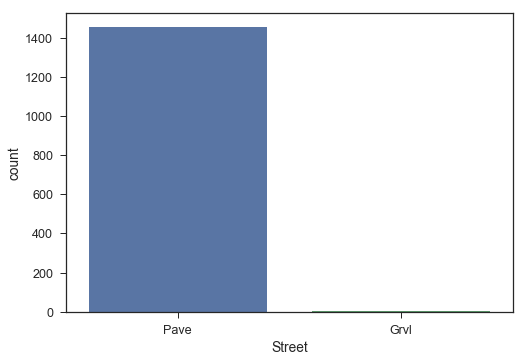

In [53]:
sns.countplot(x='Street', data=h_p)

It appears that Regular lot shapes are least expensive. Irregular shaped lots are comparitively higher, but looks like if the lot has too many flaws they are priced lesser than moderately irregular plots.

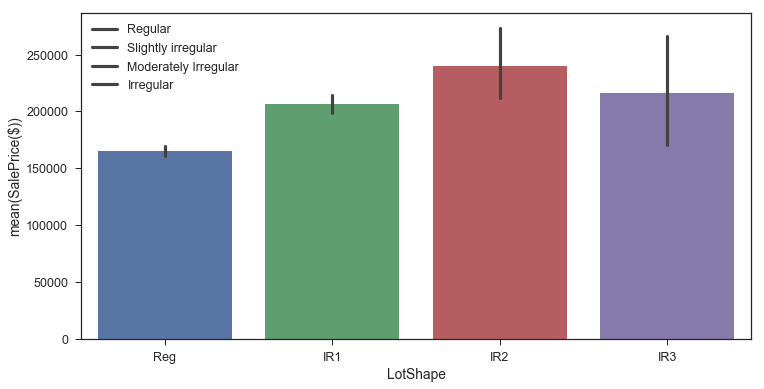

In [54]:
plt.figure(figsize = (12,6))
g = sns.barplot(x='LotShape', y='SalePrice', data=h_p)
g.set(ylabel='mean(SalePrice($))')
g.legend(['Regular','Slightly irregular','Moderately Irregular','Irregular'])

Lots with low flatness and slopes to the sides (lot) tend to be higher in price. 

Though flat lots mostly range between USD 100,000 to USD 200,000 it cocnsists of houses priced at $700,000 (these can be considered outliers)

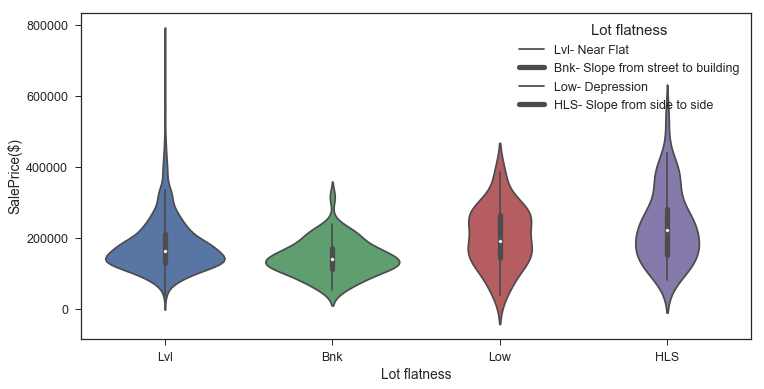

In [55]:
plt.figure(figsize=(12,6))
g = sns.violinplot(x='LandContour', y='SalePrice',data=h_p)
g.set(xlabel='Lot flatness', ylabel='SalePrice($)')
g.legend(['Lvl- Near Flat','Bnk- Slope from street to building','Low- Depression','HLS- Slope from side to side'], 
         title='Lot flatness')

There is only one house with no sewage and water. The other houses have all basic utilities (Electricity, Gas, Water, Sewage)

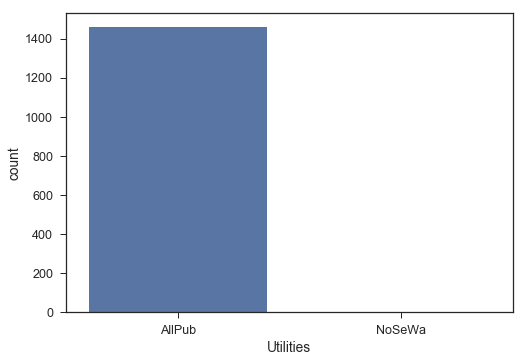

In [56]:
sns.countplot(x='Utilities', data=h_p)

Inside lots and Corner lots are priced almost equally with a mean price of $170,000

Cul-de-sac houses tend to have the highest average price of about $230,000

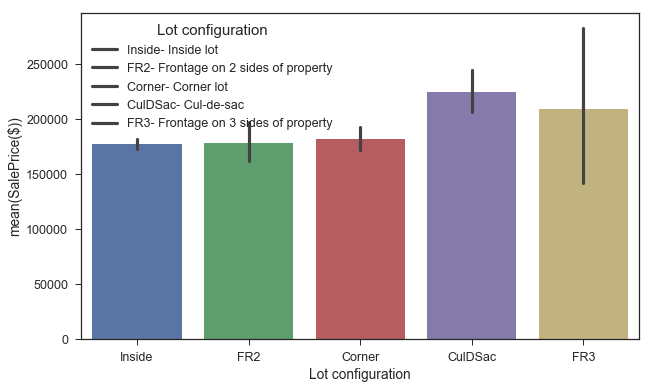

In [57]:
plt.figure(figsize=(10,6))
g = sns.barplot(x='LotConfig', y='SalePrice', data=h_p)
g.set(xlabel='Lot configuration', ylabel='mean(SalePrice($))')
g.legend(['Inside- Inside lot','FR2- Frontage on 2 sides of property','Corner- Corner lot','CulDSac- Cul-de-sac',
          'FR3- Frontage on 3 sides of property'],title='Lot configuration')

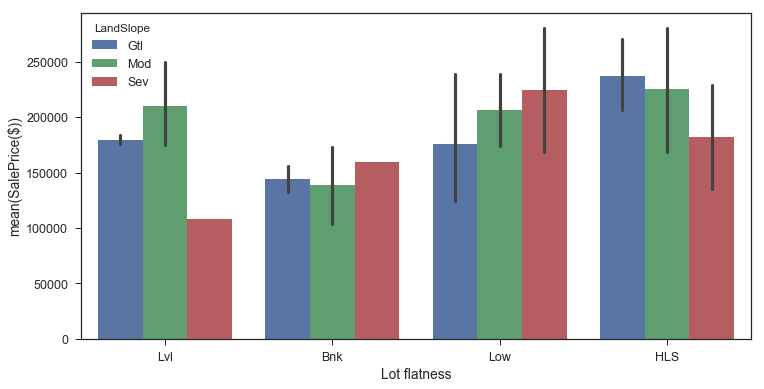

In [58]:
plt.figure(figsize=(12,6))
g = sns.barplot(x='LandContour', y='SalePrice', hue='LandSlope', data=h_p)
g.set(xlabel='Lot flatness', ylabel='mean(SalePrice($))')
#g.legend(['Lvl- Near Flat','Bnk- Slope from street to building','Low- Depression','HLS- Slope from side to side'], 
         #title='Lot flatness', loc='upper left')

Lowest price range neighborhoods are Mitchell,  Brookside, Sawyer, Iowa DOT and Rail Road, Meadow Village, and Briardale

Neighborhods like College Creek, Veenker, Crawford, Somerset, Northwest Ames, Sawyer West, Timberland, Clear Creek, Bloomington Heights have houses ranging anywhere between 100,000 USD to 350,000 USD (not considering the outliers)

Northridge, Northridge Heights, Stone Brook seem to have high end houses. Most of the houses range from 250,000 USD to 350,00 USD and go upto $75,000 for a few upscale houses.

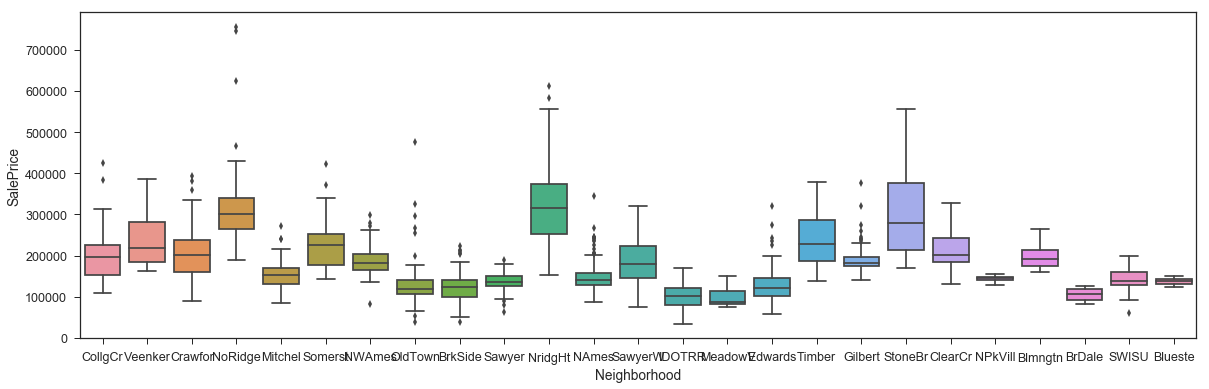

In [59]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=h_p)

Most of the houses fall under Single family or end unit town house, and the sale price for the both ranges from 50,000 USD to 300,000 USD, ignoring the outliers. 

Others settle for duplex, two family conversion or Inside unit town home, which have an avarage sale price ranging from 100,000 USD to 200,000 USD

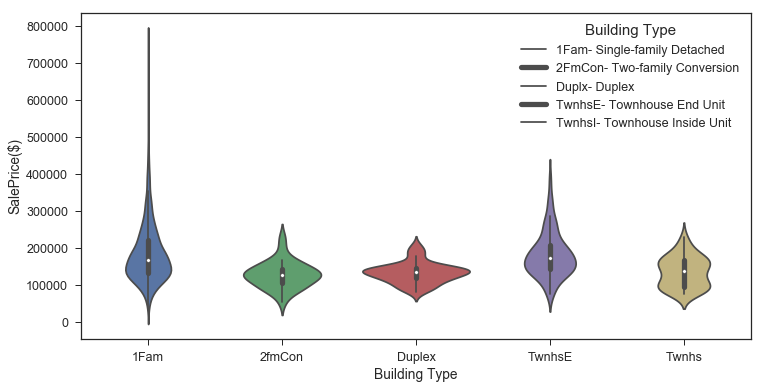

In [60]:
plt.figure(figsize=(12,6))
g = sns.violinplot(x='BldgType', y='SalePrice',data=h_p)
g.set(xlabel='Building Type', ylabel='SalePrice($)')
g.legend(['1Fam- Single-family Detached','2FmCon- Two-family Conversion','Duplx- Duplex','TwnhsE- Townhouse End Unit',
          'TwnhsI- Townhouse Inside Unit'], title='Building Type')

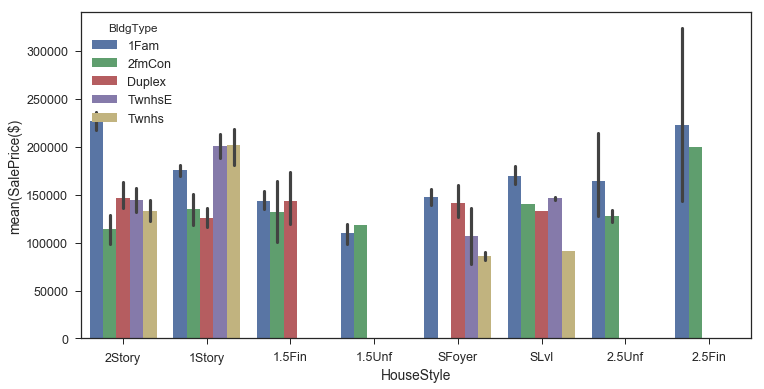

In [61]:
plt.figure(figsize=(12,6))
g = sns.barplot(x='HouseStyle', y='SalePrice', hue='BldgType',data=h_p)
g.set(ylabel='mean(SalePrice($)')
#g.legend(['1Fam- Single-family Detached','2FmCon- Two-family Conversion','Duplx- Duplex','TwnhsE- Townhouse End Unit',
         # 'TwnhsI- Townhouse Inside Unit'], title='Building Type')

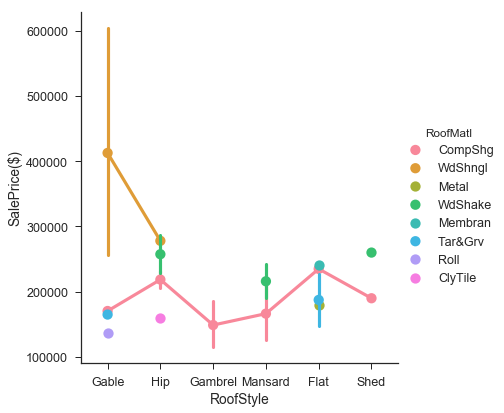

In [62]:
#plt.figure(figsize=(20,6))
g= sns.factorplot(x='RoofStyle', y='SalePrice', hue='RoofMatl', data=h_p,size=6)
g.set(ylabel='SalePrice($)')
#g.legend(['CompShg- Standard Composite Shingle','WdShngl- Wood Shingles','WdShake- Wood Shakes','Membran- Membrane',
          #'Tar&Grv- Gravel & Tar','ClyTile	Clay or Tile'], title='Roof Material')

Face brick and Common brick both range between 100,000 USD to 300,000 USD, with majority of the houses priced at approximately $180,000. 

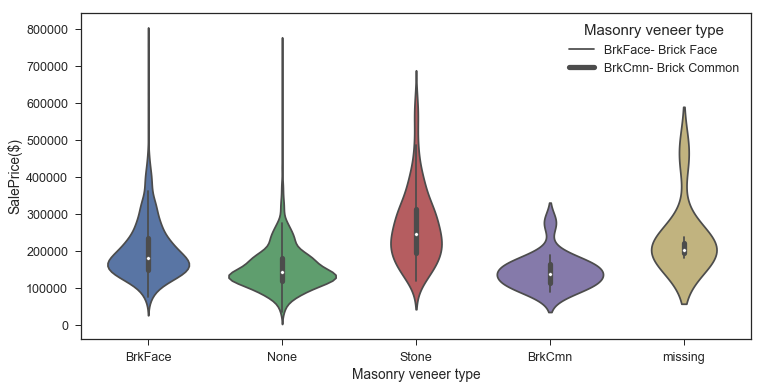

In [63]:
plt.figure(figsize=(12,6))
g = sns.violinplot(x='MasVnrType', y='SalePrice',data=h_p)
g.set(xlabel='Masonry veneer type', ylabel='SalePrice($)')
g.legend(['BrkFace- Brick Face','BrkCmn- Brick Common'], title='Masonry veneer type')

We can infer that exterior condition with Average and above average rating are priced at $180,000 approximately. This also tells us we can reduce the categories to Good and Poor instead of having five different categories

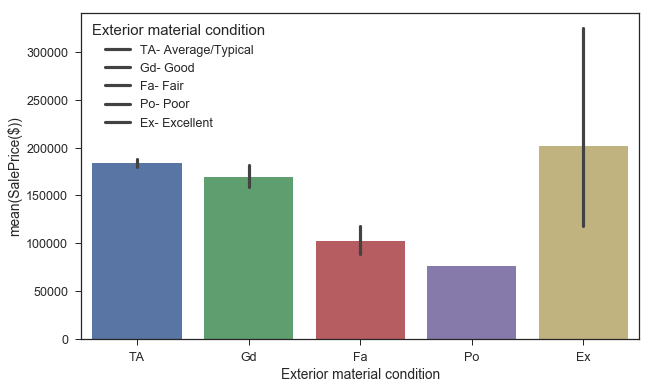

In [64]:
plt.figure(figsize=(10,6))
g= sns.barplot(x='ExterCond', y='SalePrice', data=h_p)
g.set(xlabel='Exterior material condition', ylabel='mean(SalePrice($))')
g.legend(['TA- Average/Typical','Gd- Good','Fa- Fair','Po- Poor','Ex- Excellent'],title= 'Exterior material condition')

Basement condition and Saleprice have linear correlation

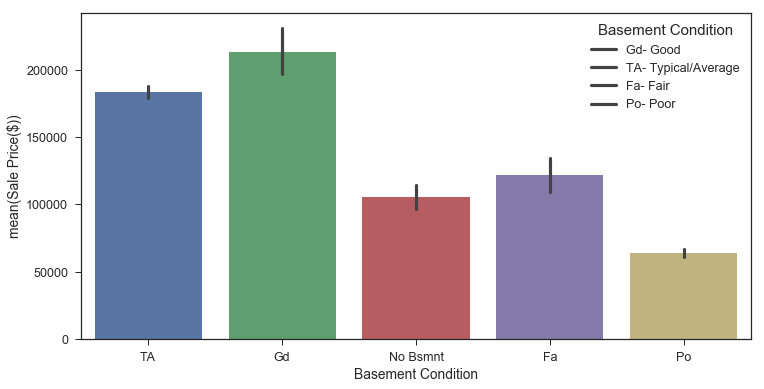

In [65]:
plt.figure(figsize=(12,6))
g = sns.barplot(x='BsmtCond', y='SalePrice', data=h_p)
g.set(xlabel='Basement Condition', ylabel='mean(Sale Price($))')
g.legend(['Gd- Good','TA- Typical/Average','Fa- Fair','Po- Poor'],title='Basement Condition')

Houses with good heating system are highly priced. Infrence - Heating condition and Saleprice are positively correlated 

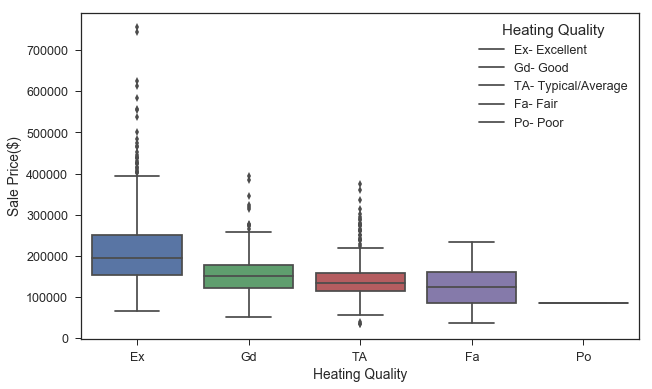

In [66]:
plt.figure(figsize=(10,6))
g = sns.boxplot(x='HeatingQC', y='SalePrice', data=h_p)
g.set(xlabel='Heating Quality', ylabel='Sale Price($)')
g.legend(['Ex- Excellent','Gd- Good','TA- Typical/Average','Fa- Fair','Po- Poor'],title='Heating Quality')

Just like the heating system, there exists a linear correlation between Centralized AC and Sale price of a house. 

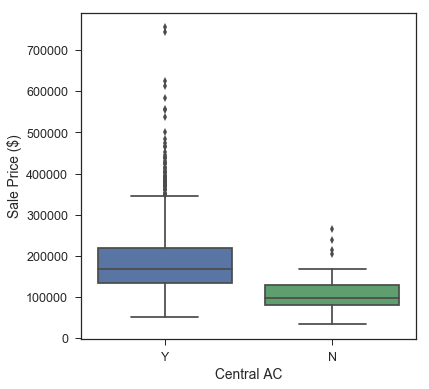

In [67]:
plt.figure(figsize=(6,6))
g = sns.boxplot(x='CentralAir', y='SalePrice', data=h_p)
g.set(xlabel='Central AC', ylabel='Sale Price ($)')

Standard wiring seems to be most acceptable for any house. From the violin plot the fair wiring houses are slightly priced more than the average and poor wiring.

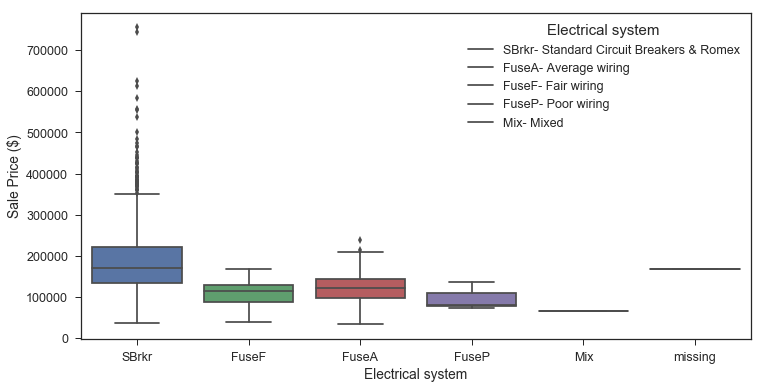

In [68]:
plt.figure(figsize=(12,6))
g = sns.boxplot(x='Electrical', y='SalePrice', data=h_p)
g.set(xlabel='Electrical system', ylabel='Sale Price ($)')
g.legend(['SBrkr- Standard Circuit Breakers & Romex','FuseA- Average wiring','FuseF- Fair wiring',
          'FuseP- Poor wiring','Mix- Mixed'],title='Electrical system')

From the graph it is evident that houses Good and Excellent quality kitchens are priced more. Therefore Kitchen Quality and Saleprice are positively corelated.

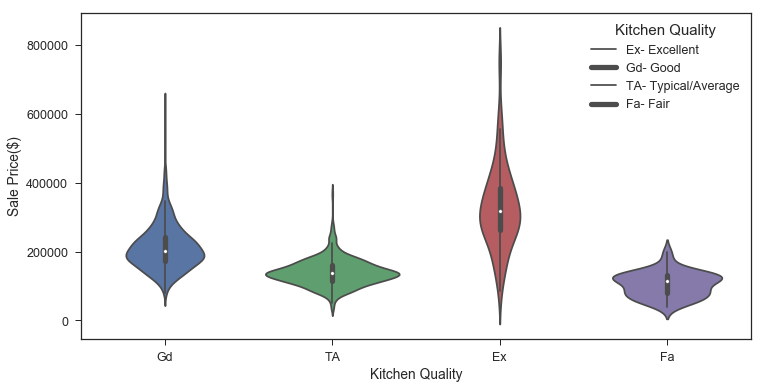

In [69]:
plt.figure(figsize=(12,6))
g=sns.violinplot(x='KitchenQual', y='SalePrice', data=h_p)
g.set(xlabel='Kitchen Quality', ylabel='Sale Price($)')
g.legend(['Ex- Excellent','Gd- Good','TA- Typical/Average','Fa- Fair'], title='Kitchen Quality')

Looks like 'Attached', 'Detached' and 'Builtin' garages are more common among most of the houses, among which Builtin garages with good condition are priced more than any other.

In conclusion houses with good and excellent garages which are either attached, detached or builtin are high priced.

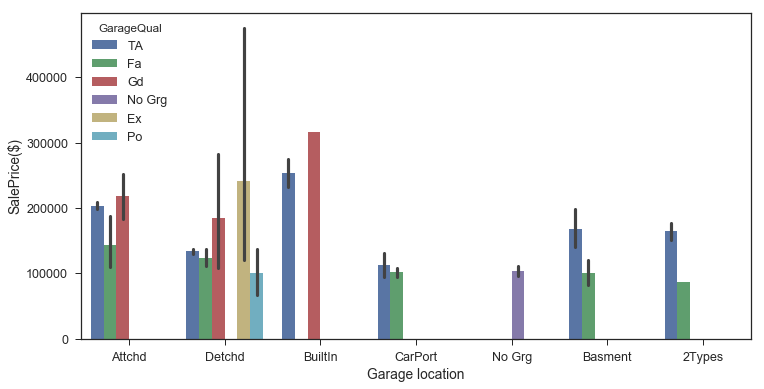

In [70]:
plt.figure(figsize=(12,6))
g = sns.barplot(x='GarageType', y='SalePrice', hue='GarageQual', data=h_p)
g.set(xlabel='Garage location', ylabel='SalePrice($)')
#g.legend(['Ex- Excellent','Gd- Good','TA- Typical/Average','Fa- Fair','Po- Poor','NA- No Garage'], title='Garage Quality')

Newly constructed and 15% down paymemt with normal interest rates houses seem to be highly priced. All the others are under $200,000 

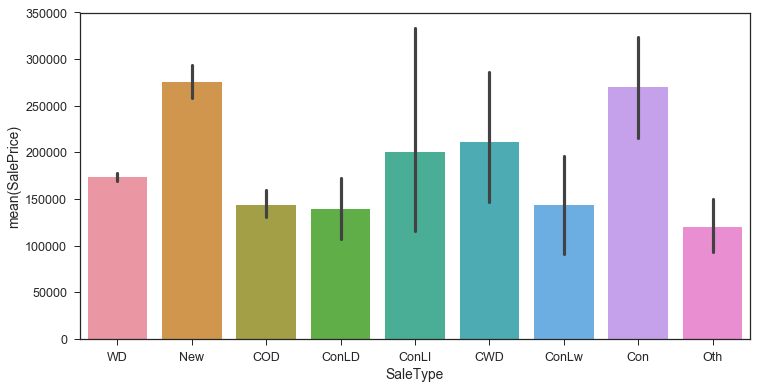

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x='SaleType', y='SalePrice', data=h_p)
g.legend(['WD- Conventional Warranty Deed','CWD- Cash Warranty Deed','VWD- VA Loan Warranty Deed',
          'New- New construction','COD- Court Officer Deed/Estate','Con- Contract 15% Down payment',
          'ConLw- Contract Low Down payment and low interest','ConLI- Contract Low Interest','ConLD- Contract Low Down',
          'Oth- Other'], title='Sale Type')

Doesn't seem to have a trend between Sale condition and Sale price. Apparantly partially built houses are priced more than normal houses. 

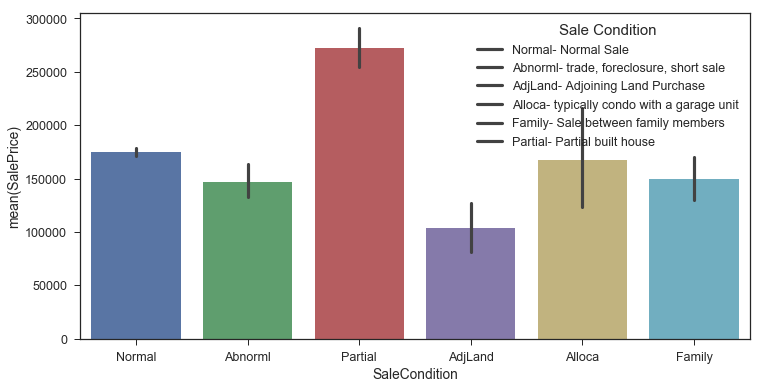

In [72]:
plt.figure(figsize=(12,6))
g = sns.barplot(x='SaleCondition', y='SalePrice', data=h_p)
g.legend(['Normal- Normal Sale','Abnorml- trade, foreclosure, short sale','AdjLand- Adjoining Land Purchase',
          'Alloca- typically condo with a garage unit','Family- Sale between family members',
          'Partial- Partial built house'], title='Sale Condition')

# Data Standardization

Standardization is very important when we are comparing measurements that have different units.

**Data Standardization:** Standardization (or Z-score normalization) is the process where the features are rescaled so that they’ll have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean.

- Standardization can be done using scale() function or StandardScaler class.
- StandardScaler is preferred over sacle() as it implements the Transformer API to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.

In [91]:
h_p[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
     'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
     'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
     'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']] = StandardScaler().fit_transform(h_p[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
                                       'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                                       '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
                                       'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                                       'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                                       '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']])

In [96]:
h_p.shape

(1460, 81)

# Encode the categorical data

In [92]:
# Used get_dummies to produce dummy variables 
new_house_prices = pd.get_dummies(h_p, columns=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
                                                'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                                                'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                                                'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                                                'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
                                                'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                                                'PavedDrive','PoolQC', 'Fence', 'MiscFeature','SaleType','SaleCondition'])

In [93]:
new_house_prices.shape

(1460, 306)

In [94]:
new_house_prices.isnull().values.any()

False

In [95]:
new_house_prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.073375,-0.225902,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511514,0.575425,...,0,0,0,1,0,0,0,0,1,0
1,2,-0.872563,0.425052,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.573359,1.171992,...,0,0,0,1,0,0,0,0,1,0
2,3,0.073375,-0.095711,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323322,0.092907,...,0,0,0,1,0,0,0,0,1,0
3,4,0.309859,-0.442886,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.573359,-0.499274,...,0,0,0,1,1,0,0,0,0,0
4,5,0.073375,0.598640,0.375148,1.374795,-0.517200,0.951632,0.733308,1.363915,0.463568,...,0,0,0,1,0,0,0,0,1,0


In [143]:
# No of columns produced only by categorical variables
s = 0
for col in h_p:
    if h_p[col].dtype == 'object':
        s  = s + h_p[col].nunique()  

# No of numerical columns 
n = len(h_p_numerical.columns)

In [158]:
# The total number of columns produced after One Hot Encoding will be the sum of 's' and 'n'
total_cols = s+n
total_cols
if len(new_house_prices.columns) == total_cols:
    print("Column numbers match: %s" % total_cols)

Column numbers match: 306


# Split the data into test and train data sets
- X_train - all the predictors
- Y_train - target variable (SalePrice)
- X_test - all the predictors
- Y_test - target variable (SalePrice)

Let's define X and Y before splitting the data

In [97]:
X = new_house_prices.drop('SalePrice', axis=1)

In [98]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, new_house_prices.SalePrice, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1022, 305)
(438, 305)
(1022,)
(438,)


# Regression Analysis

**Linear Regression**

In [99]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This is very uselful table which gives out $R^2$, coefficients of all the numerical variables along with p-values. Let us concentrate on coefficients, some are negative and others are positive. The positive correlation signifies a stronger correlation of the feature with the predictor.

In [110]:
import statsmodels.api as sm
X = h_p[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
        'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
        'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
        'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
        'MoSold','YrSold']]
Y = h_p['SalePrice']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     6.343
Date:                Mon, 06 Nov 2017   Prob (F-statistic):           5.86e-26
Time:                        15:26:30   Log-Likelihood:                -19772.
No. Observations:                1460   AIC:                         3.961e+04
Df Residuals:                    1426   BIC:                         3.979e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass    -7751.6575   6255.474     -1.239      0.215      -2e+04    4519.262
LotFrontage   -1534.7682   5948.077     -0.258      0.796   -1.32e+04    1.01e+04
LotArea        4309.4956   5442.596      0.792      0.429   -6366.859     1.5e+04
OverallQual    2.404e+04   8801.436      2.732      0.006    6776.092    4.13e+04
OverallCond    5186.2497   6161.811      0.842      0.400   -6900.937    1.73e+04
YearBuilt      8378.9476   1.08e+04      0.775      0.438   -1.28e+04    2.96e+04
YearRemodAdd   2823.7228   7593.014      0.372      0.710   -1.21e+04    1.77e+04
MasVnrArea     5626.2114   5755.739      0.977      0.328   -5664.412    1.69e+04
BsmtFinSF1     4328.7757   5429.140      0.797      0.425   -6321.182     1.5e+04
BsmtFinSF2     -228.5180   4970.623     -0.046      0.963   -9979.036    9522.000
BsmtUnfSF      -199.8616   4702.380     -0.043      0.966   -9424.185    9024.462
TotalBsmtSF    4215.0611   6698.308      0.629      0.529   -8924.534    1.74e+04
1stFlrSF       8564.0716   7957.913      1.076      0.282   -7046.401    2.42e+04
2ndFlrSF       9559.1067   6935.754      1.378      0.168   -4046.270    2.32e+04
LowQualFinSF     -7.3055   5164.098     -0.001      0.999   -1.01e+04    1.01e+04
GrLivArea      1.424e+04   7239.642      1.967      0.049      39.253    2.84e+04
BsmtFullBath   4793.3480   7264.324      0.660      0.509   -9456.561     1.9e+04
BsmtHalfBath    457.6175   5239.316      0.087      0.930   -9819.977    1.07e+04
FullBath       1887.1767   8375.684      0.225      0.822   -1.45e+04    1.83e+04
HalfBath       -943.8989   7178.262     -0.131      0.895    -1.5e+04    1.31e+04
BedroomAbvGr  -8200.3334   7444.890     -1.101      0.271   -2.28e+04    6403.777
KitchenAbvGr  -2636.0392   6153.485     -0.428      0.668   -1.47e+04    9434.814
TotRmsAbvGrd   8220.8485   1.08e+04      0.763      0.446   -1.29e+04    2.94e+04
Fireplaces     2519.7661   6138.898      0.410      0.682   -9522.474    1.46e+04
GarageYrBlt    2710.9325   8818.667      0.307      0.759   -1.46e+04       2e+04
GarageCars     8312.3492   1.15e+04      0.723      0.470   -1.42e+04    3.09e+04
GarageArea     -820.5652   1.14e+04     -0.072      0.943   -2.32e+04    2.15e+04
WoodDeckSF     2994.1661   5381.681      0.556      0.578   -7562.696    1.36e+04
OpenPorchSF    -179.1728   5386.176     -0.033      0.973   -1.07e+04    1.04e+04
EnclosedPorch   701.9129   5522.835      0.127      0.899   -1.01e+04    1.15e+04
3SsnPorch       595.4686   4931.294      0.121      0.904   -9077.901    1.03e+04
ScreenPorch    3111.9090   5137.736      0.606      0.545   -6966.422    1.32e+04
PoolArea      -1163.2670   5116.441     -0.227      0.820   -1.12e+04    8873.292
MiscVal        -392.3765   4934.544     -0.080      0.937   -1.01e+04    9287.367
MoSold         -117.1390   4997.339     -0.023   

Previously when covariavnce was run on the numerical variables, the most correlated features were OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF. 

Clearly the coefficients with higher values in Regression are MiscVal, BsmtFullBath, LowQualFinSF, OverallCond, YearRemodAdd. This change might be due to standardization of the features. 

Surprisingly Miscellaneous values has the highest coefficient, Miscellaneous value is the value of miscellaneous features like Elevator, Garage, Shed, Tennis court etc. So having these aminities bumps up the price of the house. Other features such as Full bath in basement, Low quality finished square foot, Overall condition and quality of the house, Remodel date of the house, square footage increases/ decreases the price of a house. 

In [120]:
# Features and thier respective coefficients
coeffs_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['Features', 'Estimated_Coefficients'])
coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
33,MiscVal,21298.626224
16,BsmtFullBath,15327.722991
14,LowQualFinSF,14026.806738
4,OverallCond,10836.631181
6,YearRemodAdd,10465.033786
3,OverallQual,8831.872085
12,1stFlrSF,8304.026483
9,BsmtFinSF2,6891.937360
5,YearBuilt,6805.543499
13,2ndFlrSF,5140.709475


Let us draw a regression plot between the test target values and predicted test values 

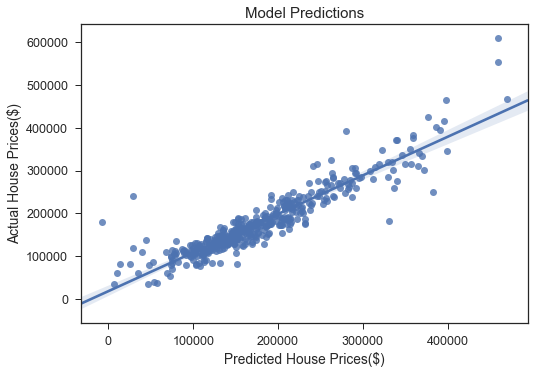

In [121]:
g = sns.regplot(x=lm.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')

Let us calcualte $R^2$ and RMSE (Root Mean Square Error) for the train and test sets.

$R^2$: It is the percentage of the response variable variation that is explained by a linear model

In [150]:
# R2 for train and test data
print(lm.score(X_train,Y_train))
print(lm.score(X_test,Y_test))

0.935756970372
0.842739137972


- The train set explains more varaince (93.3%) than the test set (84.9%). 
- An $R^2$ of 0.84 is a good score to start with. 
- Since the train score is more than test score, let us see if it is a case of Overfitting by drawing a Residual Plot

$RMSE$: is the square root of the variance of the residuals

In [218]:
from math import sqrt
RMSE_train = sqrt(np.mean((Y_train - lm.predict(X_train))**2))
RMSE_test = sqrt(np.mean((Y_test - lm.predict(X_test))**2))
print(RMSE_train)
print(RMSE_test)

20426.159608755064
30352.931279615765


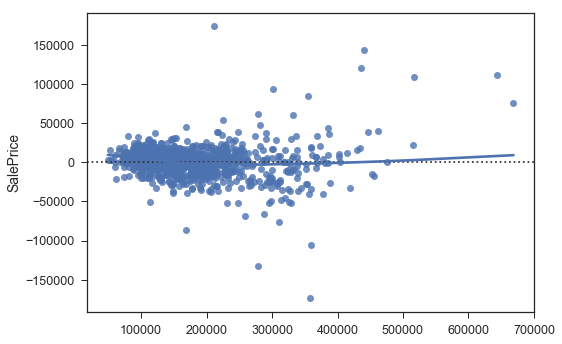

In [123]:
sns.residplot(x=lm.predict(X_train), y=Y_train, lowess=True)

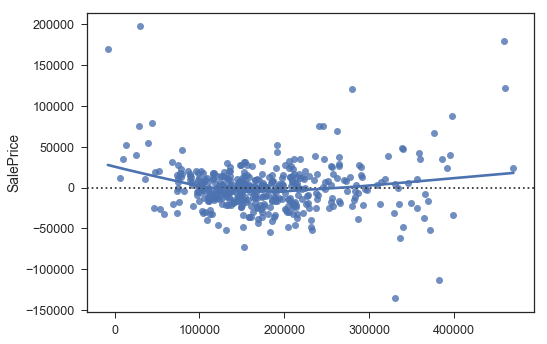

In [124]:
sns.residplot(x=lm.predict(X_test), y=Y_test, lowess=True)

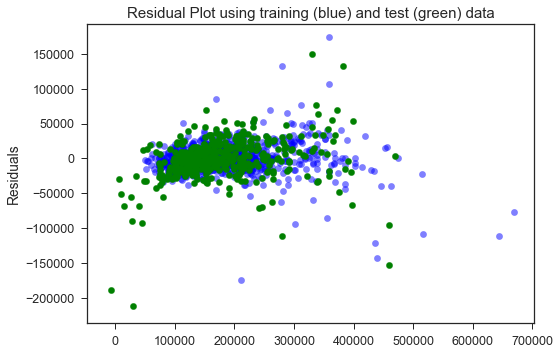

In [125]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

**Analysis:** 
- The regression line appears to be a good fit for the data.
- The train and test scores not being too different form each other, indiactes that there is no Overfitting.
- The distribution of test and train data looks similar in the residual plot. And the data is spread around -50,000 and 50,000. 
- In terms of the actual problem we can infer that there might be a difference of \$50,000 for every house if important features like aminities, full bath in basement, quality of finished square footage, Overall condition and quality of the house, Remodel date etc. 
- This seems to be relevant in the real world scenario. For example the difference between a basement house and a non-basement house is \$50,000. Similarly an increase in number of bedrooms/ bathrooms/ square footage can increase the price of the house by \$30,000 - \$40,000.
    

**Let us run Ridge and Lasso Regression on the data implementing K-fold Cross Validation.**

**Ridge Regression**

In [199]:
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
ridge_reg = RidgeCV(alphas=alphas, cv=None, store_cv_values=True)
ridge_reg.fit(X_train,Y_train)

RidgeCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [227]:
R2_train = (ridge_reg.score(X_train, Y_train))
R2_test = (ridge_reg.score(X_test,Y_test))
print(R2_train)
print(R2_test)

0.898099217196
0.886577668422


- The train set explains obtained an $R^2$ of 0.89 and test set got an $R^2$ of 0.88.
- There is very little difference between train and test set, this signifies that the model is a good fit for data.

In [221]:
#RMSE_train = sqrt(np.mean((Y_train - ridge_reg.predict(X_train))**2))
#print(RMSE_train)
RSS_train = np.sum((ridge_reg.predict(X_train) - Y_train)**2)
print(RSS_train)

676356775147.28


In [229]:
ret = [R2_train]
ret.extend([ridge_reg.intercept_]) 
ret.extend([ridge_reg.coef_])
return ret

SyntaxError: 'return' outside function (<ipython-input-229-c08519a0e420>, line 4)

In [ ]:
col = ['R2_train']

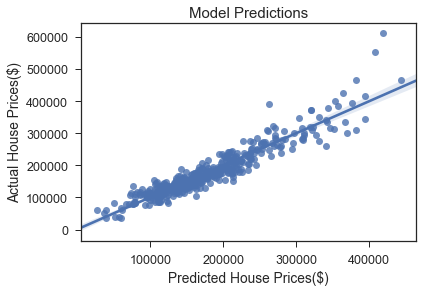

In [201]:
# Regression plot 
g = sns.regplot(x=ridge_reg.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')

**Residual plots**

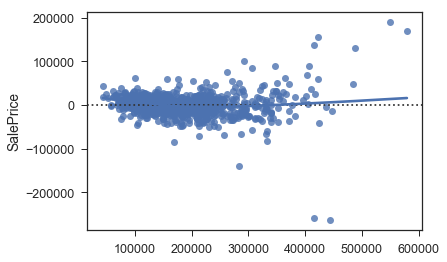

In [202]:
sns.residplot(x=ridge_reg.predict(X_train), y=Y_train, lowess=True)

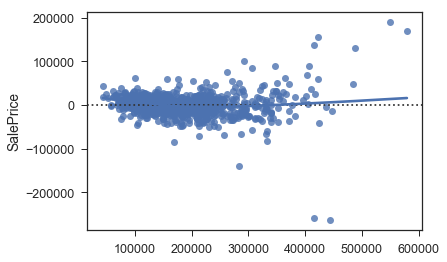

In [203]:
sns.residplot(x=ridge_reg.predict(X_train), y=Y_train, lowess=True)

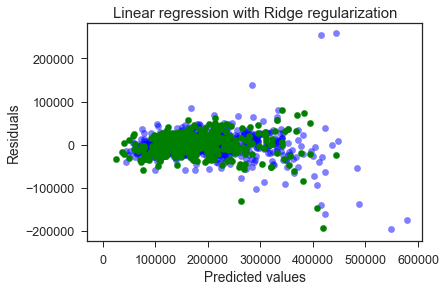

In [204]:
plt.scatter(ridge_reg.predict(X_train), ridge_reg.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(ridge_reg.predict(X_test), ridge_reg.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel('Residuals')

In [205]:
# Features and thier respective coefficients
coeffs_df = pd.DataFrame(list(zip(X.columns, ridge_reg.coef_)), columns = ['Features', 'Estimated_Coefficients'])
coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
16,BsmtFullBath,15120.595840
4,OverallCond,14442.505839
14,LowQualFinSF,12992.951015
26,GarageArea,11016.749147
13,2ndFlrSF,5919.494230
5,YearBuilt,5738.125302
23,Fireplaces,5154.235404
6,YearRemodAdd,5140.174280
3,OverallQual,4739.258703
19,HalfBath,4460.987753


**Lasso Regression**

In [213]:
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
lasso_reg = LassoCV(alphas=alphas, cv=None, max_iter=50000, tol=0.1,selection='random')
lasso_reg.fit(X_train,Y_train)

LassoCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10],
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='random', tol=0.1,
    verbose=False)

In [214]:
lasso_reg.mse_path_

array([[  1.94300634e+09,   3.35519683e+09,   1.80755890e+09],
       [  1.52479934e+09,   3.28376422e+09,   1.80278475e+09],
       [  1.40951757e+09,   3.30107675e+09,   1.81877555e+09],
       [  1.27897092e+09,   3.24935038e+09,   1.84759160e+09],
       [  1.27438240e+09,   3.25647792e+09,   1.85115715e+09],
       [  1.18808915e+09,   3.25170817e+09,   1.85028728e+09],
       [  1.19447265e+09,   3.21448310e+09,   1.84790547e+09],
       [  1.19202371e+09,   3.18854529e+09,   1.81758251e+09],
       [  1.19013680e+09,   3.18644547e+09,   1.80871362e+09],
       [  1.18500995e+09,   3.18084746e+09,   1.78075374e+09]])

In [215]:
# Features and thier respective coefficients
coeffs_df = pd.DataFrame(list(zip(X.columns, lasso_reg.coef_)), columns = ['Features', 'Estimated_Coefficients'])
coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
4,OverallCond,16985.111071
9,BsmtFinSF2,11802.771388
13,2ndFlrSF,9420.083203
23,Fireplaces,7812.933099
26,GarageArea,6442.274491
16,BsmtFullBath,5289.566054
3,OverallQual,5253.470628
5,YearBuilt,4824.543965
33,MiscVal,3892.889818
11,TotalBsmtSF,3703.117561


In [ ]:
# Using OneHot Encoder to encode the categorical data
#oe = OneHotEncoder(sparse = False, dtype=np.int64)
#for column in h_p.columns.values:
 #   if h_p[column].dtype == object:
        #oe.fit(h_p)
        #oe_df = oe.transform(h_p[column])

In [ ]:
# Use One hot encoding to encode the categorical varibales to numerical
# Create an object for OneHotEncoder class
#onehot_encoder = OneHotEncoder()
#onehot_encoder.fit(h_p_categorical)

In [ ]:
# Use One hot encoding to encode the categorical varibales to numerical
# Create an object for OneHotEncoder class
#onehot_encoder = OneHotEncoder()
#onehot_encoder.fit(h_p_categorical.iloc[:,:])